# Using KNN Algorithm to predict if a person will have diabetes or not

### importing libraries

In [16]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns

In [17]:
# Load and preprocess data (same as your existing code)
data = pd.read_csv(r'C:\Users\LOQ\Downloads\MLCASESTUDY\diabetes_prediction_with_knn\diabetes.csv')


In [18]:
# Replace zero values with mean
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']
for col in zero_not_accepted:
    data[col] = data[col].replace(0, np.nan)
    data[col].fillna(data[col].mean(), inplace=True)

C:\Users\LOQ\AppData\Local\Temp\ipykernel_24376\2408577688.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [19]:
# Extract features and target
X = data.iloc[:,0:8]
y = data.iloc[:,8]

In [20]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("🔍 Finding Optimal K Value for KNN Diabetes Prediction")
print("=" * 60)


🔍 Finding Optimal K Value for KNN Diabetes Prediction


In [21]:
# Test different k values
k_range = range(1, 31)
test_accuracies = []
train_accuracies = []
cv_accuracies = []
f1_scores = []

print("Testing k values from 1 to 30...")
print("k\tTrain Acc\tTest Acc\tCV Acc\t\tF1 Score")
print("-" * 60)


for k in k_range:
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Calculate train accuracy
    train_pred = knn.predict(X_train_scaled)
    train_acc = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_acc)
    
    # Calculate test accuracy
    test_pred = knn.predict(X_test_scaled)
    test_acc = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_acc)
    
    # Calculate F1 score
    f1 = f1_score(y_test, test_pred)
    f1_scores.append(f1)
    
    # Calculate cross-validation accuracy
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_acc = cv_scores.mean()
    cv_accuracies.append(cv_acc)
    
    # Print results for every 3rd k value
    if k % 3 == 0 or k == 1:
        print(f"{k}\t{train_acc:.4f}\t\t{test_acc:.4f}\t\t{cv_acc:.4f}\t\t{f1:.4f}")

# Find optimal k values
best_k_test = k_range[np.argmax(test_accuracies)]
best_k_cv = k_range[np.argmax(cv_accuracies)]
best_k_f1 = k_range[np.argmax(f1_scores)]

print("\n" + "=" * 60)
print("🎯 OPTIMAL K VALUES FOUND:")
print("=" * 60)
print(f"Best k for Test Accuracy: {best_k_test} (Accuracy: {max(test_accuracies):.4f})")
print(f"Best k for Cross-Validation: {best_k_cv} (CV Accuracy: {max(cv_accuracies):.4f})")
print(f"Best k for F1 Score: {best_k_f1} (F1 Score: {max(f1_scores):.4f})")

# Recommended k is based on cross-validation (most reliable)
recommended_k = best_k_cv
print(f"\n🏆 RECOMMENDED K: {recommended_k}")
print("(Based on cross-validation for better generalization)")

Testing k values from 1 to 30...
k	Train Acc	Test Acc	CV Acc		F1 Score
------------------------------------------------------------
1	1.0000		0.7532		0.6776		0.6122
3	0.8339		0.7857		0.7101		0.6598
6	0.8013		0.7857		0.7345		0.5823
9	0.8013		0.8052		0.7558		0.6739
12	0.7915		0.7987		0.7427		0.6265
15	0.7834		0.8182		0.7476		0.6889
18	0.7818		0.8052		0.7345		0.6429
21	0.7834		0.7792		0.7411		0.6222
24	0.7736		0.7857		0.7378		0.6207
27	0.7785		0.8182		0.7427		0.6889
30	0.7606		0.7922		0.7379		0.6190

🎯 OPTIMAL K VALUES FOUND:
Best k for Test Accuracy: 13 (Accuracy: 0.8182)
Best k for Cross-Validation: 9 (CV Accuracy: 0.7558)
Best k for F1 Score: 13 (F1 Score: 0.6889)

🏆 RECOMMENDED K: 9
(Based on cross-validation for better generalization)


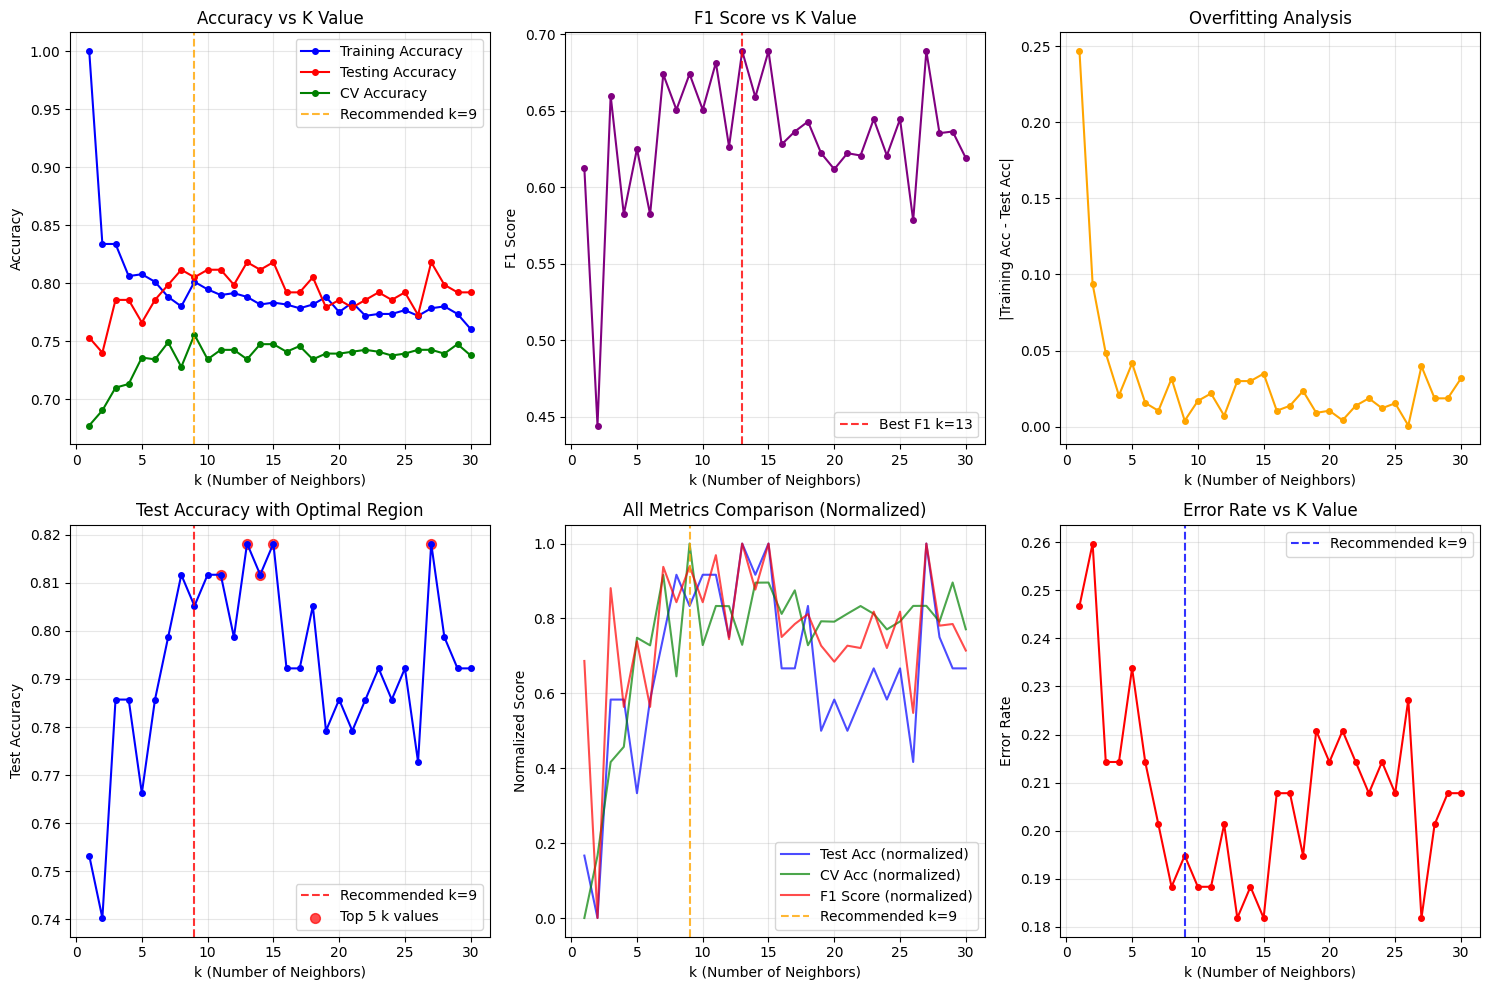


📊 DETAILED COMPARISON:
Original Model (k=11):
  - Test Accuracy: 0.8117
  - F1 Score: 0.6813

Optimal Model (k=9):
  - Test Accuracy: 0.8052
  - F1 Score: 0.6739

📈 IMPROVEMENT:
  - Accuracy improvement: -0.80%
  - F1 Score improvement: -1.09%


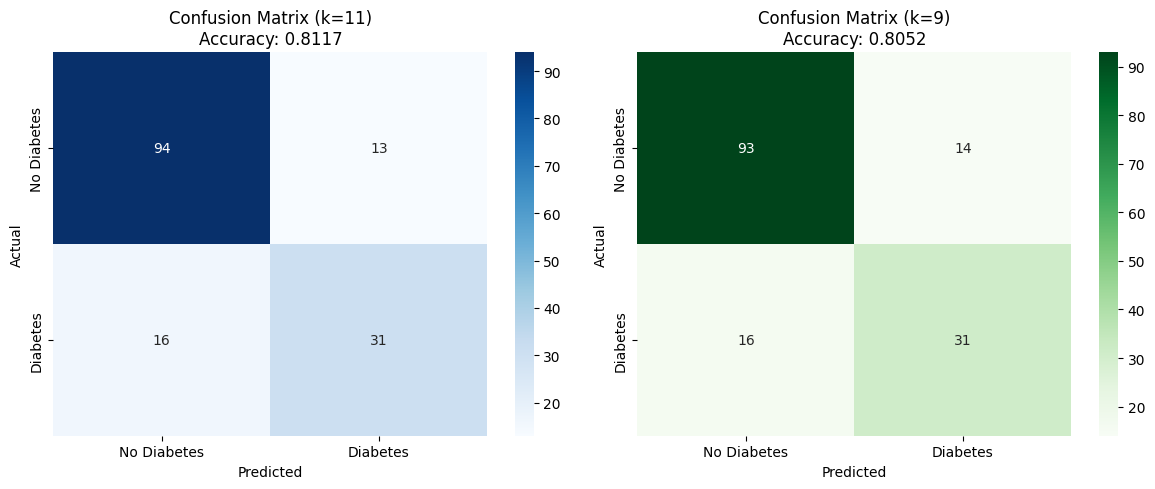


🔟 TOP 10 K VALUES (by Cross-Validation Accuracy):
 k  test_accuracy  cv_accuracy  f1_score
 9         0.8052       0.7558    0.6739
 7         0.7987       0.7492    0.6737
29         0.7922       0.7476    0.6364
15         0.8182       0.7476    0.6889
14         0.8117       0.7476    0.6588
17         0.7922       0.7460    0.6364
27         0.8182       0.7427    0.6889
26         0.7727       0.7427    0.5783
11         0.8117       0.7427    0.6813
22         0.7857       0.7427    0.6207

🎯 FINAL RECOMMENDATION:
Use k = 9 for your KNN diabetes prediction model
This gives you the best cross-validation accuracy of 0.7558
Your code should be:
classifier = KNeighborsClassifier(n_neighbors=9, p=2, metric='euclidean')

💾 Detailed results saved to: k_optimization_results.csv
Run complete! 🎉


In [22]:


# Create visualizations
plt.figure(figsize=(15, 10))

# Plot 1: Accuracy comparison
plt.subplot(2, 3, 1)
plt.plot(k_range, train_accuracies, 'b-o', label='Training Accuracy', markersize=4)
plt.plot(k_range, test_accuracies, 'r-o', label='Testing Accuracy', markersize=4)
plt.plot(k_range, cv_accuracies, 'g-o', label='CV Accuracy', markersize=4)
plt.axvline(x=recommended_k, color='orange', linestyle='--', alpha=0.8, label=f'Recommended k={recommended_k}')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K Value')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: F1 Score
plt.subplot(2, 3, 2)
plt.plot(k_range, f1_scores, 'purple', marker='o', markersize=4)
plt.axvline(x=best_k_f1, color='red', linestyle='--', alpha=0.8, label=f'Best F1 k={best_k_f1}')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs K Value')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Bias-Variance visualization
plt.subplot(2, 3, 3)
train_test_gap = [abs(train - test) for train, test in zip(train_accuracies, test_accuracies)]
plt.plot(k_range, train_test_gap, 'orange', marker='o', markersize=4)
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('|Training Acc - Test Acc|')
plt.title('Overfitting Analysis')
plt.grid(True, alpha=0.3)

# Plot 4: Test accuracy with optimal region
plt.subplot(2, 3, 4)
plt.plot(k_range, test_accuracies, 'b-o', markersize=4)
plt.axvline(x=recommended_k, color='red', linestyle='--', alpha=0.8, label=f'Recommended k={recommended_k}')
# Highlight the top 5 k values
top_5_indices = np.argsort(test_accuracies)[-5:]
top_5_k = [k_range[i] for i in top_5_indices]
top_5_acc = [test_accuracies[i] for i in top_5_indices]
plt.scatter(top_5_k, top_5_acc, color='red', s=50, alpha=0.7, label='Top 5 k values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy with Optimal Region')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 5: All metrics together (normalized)
plt.subplot(2, 3, 5)
norm_test = [(acc - min(test_accuracies))/(max(test_accuracies) - min(test_accuracies)) for acc in test_accuracies]
norm_cv = [(acc - min(cv_accuracies))/(max(cv_accuracies) - min(cv_accuracies)) for acc in cv_accuracies]
norm_f1 = [(score - min(f1_scores))/(max(f1_scores) - min(f1_scores)) for score in f1_scores]

plt.plot(k_range, norm_test, 'b-', label='Test Acc (normalized)', alpha=0.7)
plt.plot(k_range, norm_cv, 'g-', label='CV Acc (normalized)', alpha=0.7)
plt.plot(k_range, norm_f1, 'r-', label='F1 Score (normalized)', alpha=0.7)
plt.axvline(x=recommended_k, color='orange', linestyle='--', alpha=0.8, label=f'Recommended k={recommended_k}')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Normalized Score')
plt.title('All Metrics Comparison (Normalized)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 6: Error rate
plt.subplot(2, 3, 6)
error_rates = [1 - acc for acc in test_accuracies]
plt.plot(k_range, error_rates, 'red', marker='o', markersize=4)
plt.axvline(x=recommended_k, color='blue', linestyle='--', alpha=0.8, label=f'Recommended k={recommended_k}')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K Value')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare your original k=11 with the optimal k
print("\n" + "=" * 60)
print("📊 DETAILED COMPARISON:")
print("=" * 60)

# Original model (k=11)
knn_original = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
knn_original.fit(X_train_scaled, y_train)
original_test_acc = knn_original.score(X_test_scaled, y_test)
original_pred = knn_original.predict(X_test_scaled)
original_f1 = f1_score(y_test, original_pred)

# Optimal model
knn_optimal = KNeighborsClassifier(n_neighbors=recommended_k, p=2, metric='euclidean')
knn_optimal.fit(X_train_scaled, y_train)
optimal_test_acc = knn_optimal.score(X_test_scaled, y_test)
optimal_pred = knn_optimal.predict(X_test_scaled)
optimal_f1 = f1_score(y_test, optimal_pred)

print(f"Original Model (k=11):")
print(f"  - Test Accuracy: {original_test_acc:.4f}")
print(f"  - F1 Score: {original_f1:.4f}")
print(f"\nOptimal Model (k={recommended_k}):")
print(f"  - Test Accuracy: {optimal_test_acc:.4f}")
print(f"  - F1 Score: {optimal_f1:.4f}")

improvement_acc = ((optimal_test_acc - original_test_acc) / original_test_acc) * 100
improvement_f1 = ((optimal_f1 - original_f1) / original_f1) * 100

print(f"\n📈 IMPROVEMENT:")
print(f"  - Accuracy improvement: {improvement_acc:+.2f}%")
print(f"  - F1 Score improvement: {improvement_f1:+.2f}%")

# Show confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Original model confusion matrix
cm_original = confusion_matrix(y_test, original_pred)
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
ax1.set_title(f'Confusion Matrix (k=11)\nAccuracy: {original_test_acc:.4f}')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Optimal model confusion matrix
cm_optimal = confusion_matrix(y_test, optimal_pred)
sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Greens', ax=ax2,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
ax2.set_title(f'Confusion Matrix (k={recommended_k})\nAccuracy: {optimal_test_acc:.4f}')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Save results
results_df = pd.DataFrame({
    'k': k_range,
    'train_accuracy': train_accuracies,
    'test_accuracy': test_accuracies,
    'cv_accuracy': cv_accuracies,
    'f1_score': f1_scores
})

# Top 10 performing k values
top_10 = results_df.nlargest(10, 'cv_accuracy')[['k', 'test_accuracy', 'cv_accuracy', 'f1_score']]
print("\n" + "=" * 60)
print("🔟 TOP 10 K VALUES (by Cross-Validation Accuracy):")
print("=" * 60)
print(top_10.round(4).to_string(index=False))

# Final recommendation
print("\n" + "=" * 60)
print("🎯 FINAL RECOMMENDATION:")
print("=" * 60)
print(f"Use k = {recommended_k} for your KNN diabetes prediction model")
print(f"This gives you the best cross-validation accuracy of {max(cv_accuracies):.4f}")
print(f"Your code should be:")
print(f"classifier = KNeighborsClassifier(n_neighbors={recommended_k}, p=2, metric='euclidean')")

# Save detailed results
results_df.to_csv('k_optimization_results.csv', index=False)
print(f"\n💾 Detailed results saved to: k_optimization_results.csv")
print("Run complete! 🎉")

In [23]:
import numpy as np

# Example custom input: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
custom_input = np.array([[2, 120, 70, 20, 79, 25.5, 0.2, 30]])

# Make prediction
prediction = knn.predict(custom_input)

# Show result
if prediction[0] == 1:
    print("The model predicts: Diabetic")
else:
    print("The model predicts: Not Diabetic")

The model predicts: Diabetic
